In [75]:
data1 <- read.csv("final_stats_weight.csv")

In [50]:
data1['new'] <- sign(data1$'log2FoldChange')*data1$'padj'

In [25]:
library('EnhancedVolcano')

In [59]:
head(data1)

,Hugo_Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,new
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC100130426100130426,4.156035e-02,6.871078e-04,0.12576530,0.0984878592,0.9215449,0.9994535,0.9994535
2,UBE2Q2P3,3.122496e+00,3.280110e-05,0.07079861,0.0034032280,0.9972846,0.9994535,0.9994535
3,UBE2Q2P3-1,4.197432e+00,1.061831e-05,0.07137421,0.0008296801,0.9993380,0.9999435,0.9999435
4,HMGB1P1,2.083446e+02,-6.716773e-03,0.06704059,-0.4863296890,0.6267334,0.9994535,-0.9994535
5,TIMM23,1.379556e+03,1.593726e-02,0.07077798,1.0096887542,0.3126444,0.9031680,0.9031680
6,MOXD2,0.000000e+00,NA,NA,NA,NA,NA,NA


In [62]:
write.table(data1[c('Hugo_Symbol', 'new')], file='gene_test2.txt', sep='\t', row.names=FALSE, quote=FALSE,
             col.names=FALSE, )

In [76]:
data_new <- data1[data1$'padj'<0.05,c('Hugo_Symbol')]

In [77]:
data_new <- na.omit(data_new)

In [78]:
write.table(data.frame(data_new), file='go_genes_weight.txt', sep='\t', row.names=FALSE, quote=FALSE,
             col.names=FALSE, )

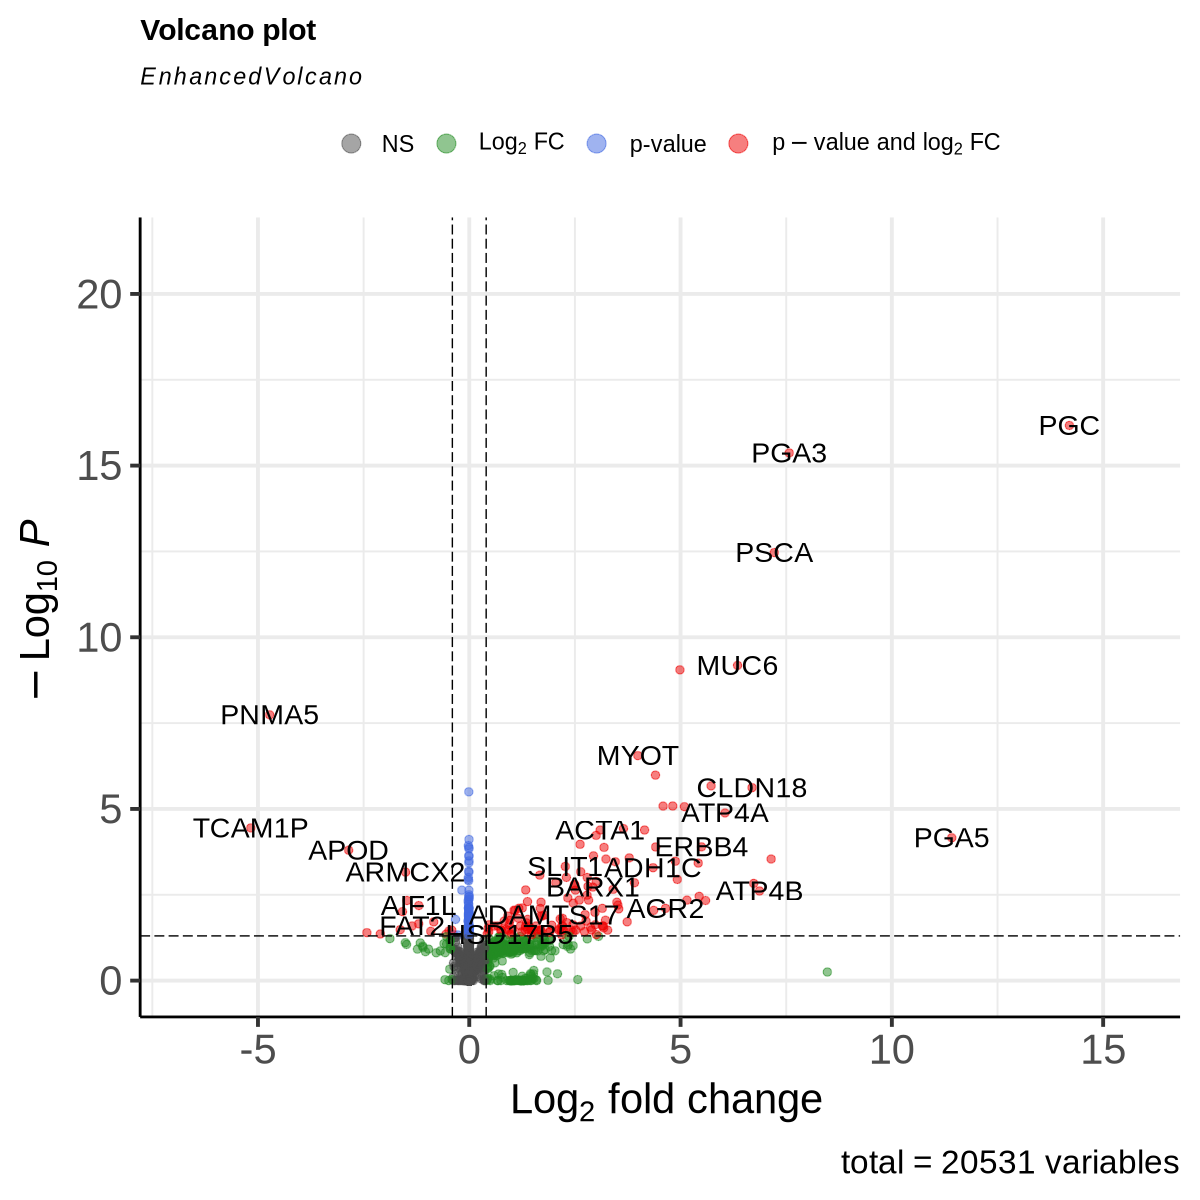

In [47]:
options(repr.plot.width = 10, repr.plot.height = 10)

EnhancedVolcano(data1,
    lab = data1$'Hugo_Symbol',
    x = 'log2FoldChange',
    y = 'padj',
   # xlim = c(-2,2), 
    FCcutoff = 0.4,
    pCutoff = 0.05, 
    axisLabSize=25,
    captionLabSize=20,
    labSize=6)